<a href="https://colab.research.google.com/github/KudryashovDmitry/PDA_SOL/blob/main/Lab_2_KudryashovDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# 1. Импорт необходимых библиотек
import requests
from lxml import html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# 2. Отправка GET-запроса к целевому URL
url = 'https://www.banki.ru/news/daytheme/?id=11003787'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}
response = requests.get(url, headers=headers)

In [32]:
# 3. Проверка ответа от сервера
if response.status_code == 200:
    page_content = response.content
    print("Страница успешно загружена!")
else:
    print(f"Ошибка при получении страницы: {response.status_code}")
    exit()

Страница успешно загружена!


In [33]:
# 4. Парсинг HTML-страницы с использованием lxml
tree = html.fromstring(page_content)


In [34]:
# 5. Использование XPath для извлечения данных
# Извлекаем данные из таблицы
banks = tree.xpath('//figure[@class="table"]//table/tbody/tr[position()>1]')

data = []

for bank in banks:
    # Извлекаем данные из строк таблицы
    bank_name = bank.xpath('./td[1]/a/text()')[0].strip()
    rate = bank.xpath('./td[2]/text()')[0].strip()
    total_cost = bank.xpath('./td[3]/text()')[0].strip()
    sum_ = bank.xpath('./td[4]/text()')[0].strip()
    term = bank.xpath('./td[5]/text()')[0].strip()

    data.append({
        'Bank': bank_name,
        'Rate': rate,
        'Total Cost': total_cost,
        'Sum': sum_,
        'Term': term
    })

# Проверка извлечённых данных
for item in data:
    print(item)


{'Bank': 'Т-Банк', 'Rate': '15,9 — 34,9% годовых', 'Total Cost': '15,579 — 40,000%', 'Sum': 'до 5 млн рублей', 'Term': 'до 5 лет'}
{'Bank': 'ВТБ', 'Rate': '3,9 — 44,2% годовых', 'Total Cost': '13,900 — 44,300%', 'Sum': 'до 40 млн рублей', 'Term': 'до 7 лет'}
{'Bank': 'Почта Банк', 'Rate': '12,9 — 29,9% годовых', 'Total Cost': '22,851 — \xa034,920%', 'Sum': 'до 6 млн рублей', 'Term': 'до 7 лет'}
{'Bank': 'Локо-Банк', 'Rate': '15,9 — 35,9% годовых', 'Total Cost': '22,838 — 48,455%', 'Sum': 'до 5 млн рублей', 'Term': 'до 5 лет'}
{'Bank': 'Сбербанк', 'Rate': '17,9 — 39,9% годовых', 'Total Cost': '17,900 — 40,200%', 'Sum': 'до 30 млн рублей', 'Term': 'до 5 лет'}
{'Bank': 'Газпромбанк', 'Rate': '19,9 — 29,4% годовых', 'Total Cost': '20,182 — 32,649%', 'Sum': 'до 7 млн рублей', 'Term': 'до 8 лет'}
{'Bank': 'Русский Стандарт', 'Rate': '16,9 — 39,9% годовых', 'Total Cost': '16,854 \xa0— 39,869%', 'Sum': 'до 1 млн рублей', 'Term': 'до 5 лет'}
{'Bank': 'Альфа-Банк', 'Rate': '19,99 — 60,99% годовы

In [35]:
# 6. Создание DataFrame
df = pd.DataFrame(data)

In [38]:
# Функция для преобразования диапазонов в минимальные и максимальные значения
def extract_range(value):
    if isinstance(value, str) and '—' in value:
        numbers = value.split('—')
        min_value = float(numbers[0].replace(',', '.').strip())
        # Убираем лишние символы и пробелы для максимального значения
        max_value = float(numbers[1].replace(',', '.').strip().replace('%', '').replace('годовых', '').strip())
        return (min_value, max_value)
    else:
        return (None, None)

In [39]:
# Преобразуем 'Rate' и 'Total Cost'
df[['Min Rate', 'Max Rate']] = df['Rate'].apply(extract_range).apply(pd.Series)
df[['Min Total Cost', 'Max Total Cost']] = df['Total Cost'].apply(extract_range).apply(pd.Series)


In [40]:
print(df)


               Bank                    Rate         Total Cost  \
0            Т-Банк    15,9 — 34,9% годовых   15,579 — 40,000%   
1               ВТБ     3,9 — 44,2% годовых   13,900 — 44,300%   
2        Почта Банк    12,9 — 29,9% годовых  22,851 —  34,920%   
3         Локо-Банк    15,9 — 35,9% годовых   22,838 — 48,455%   
4          Сбербанк    17,9 — 39,9% годовых   17,900 — 40,200%   
5       Газпромбанк    19,9 — 29,4% годовых   20,182 — 32,649%   
6  Русский Стандарт    16,9 — 39,9% годовых  16,854  — 39,869%   
7        Альфа-Банк  19,99 — 60,99% годовых   19,990 — 60,990%   
8        «Открытие»    11,4 — 38,8% годовых   11,349 — 41,989%   
9          МТС Банк     5,9 — 42,9% годовых   11,658 — 36,979%   

                 Sum      Term  Min Rate  Max Rate  Min Total Cost  \
0    до 5 млн рублей  до 5 лет     15.90     34.90          15.579   
1   до 40 млн рублей  до 7 лет      3.90     44.20          13.900   
2    до 6 млн рублей  до 7 лет     12.90     29.90          22.

In [41]:
# Анализ
print(df.describe())

# Топ 5 банков по минимальной процентной ставке
print("\nТоп 5 банков по минимальной процентной ставке:")
print(df.nlargest(5, 'Min Rate')[['Bank', 'Min Rate']])

# Банк с максимальной процентной ставкой
print("\nБанк с наибольшей максимальной процентной ставкой:")
print(df.loc[df['Max Rate'].idxmax()][['Bank', 'Max Rate']])

# Банк с минимальной процентной ставкой
print("\nБанк с наименьшей минимальной процентной ставкой:")
print(df.loc[df['Min Rate'].idxmin()][['Bank', 'Min Rate']])


        Min Rate   Max Rate  Min Total Cost  Max Total Cost
count  10.000000  10.000000       10.000000       10.000000
mean   14.059000  39.679000       17.310100       42.035100
std     5.548626   8.970629        4.207815        8.042416
min     3.900000  29.400000       11.349000       32.649000
25%    11.775000  35.150000       14.319750       37.701500
50%    15.900000  39.350000       17.377000       40.100000
75%    17.650000  42.150000       20.134000       43.722250
max    19.990000  60.990000       22.851000       60.990000

Топ 5 банков по минимальной процентной ставке:
               Bank  Min Rate
7        Альфа-Банк     19.99
5       Газпромбанк     19.90
4          Сбербанк     17.90
6  Русский Стандарт     16.90
0            Т-Банк     15.90

Банк с наибольшей максимальной процентной ставкой:
Bank        Альфа-Банк
Max Rate         60.99
Name: 7, dtype: object

Банк с наименьшей минимальной процентной ставкой:
Bank        ВТБ
Min Rate    3.9
Name: 1, dtype: object


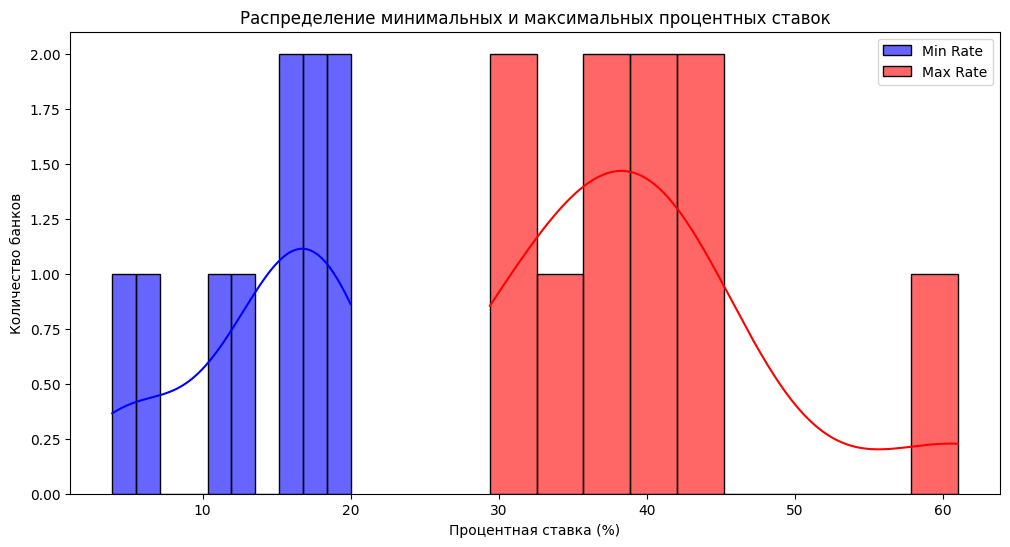

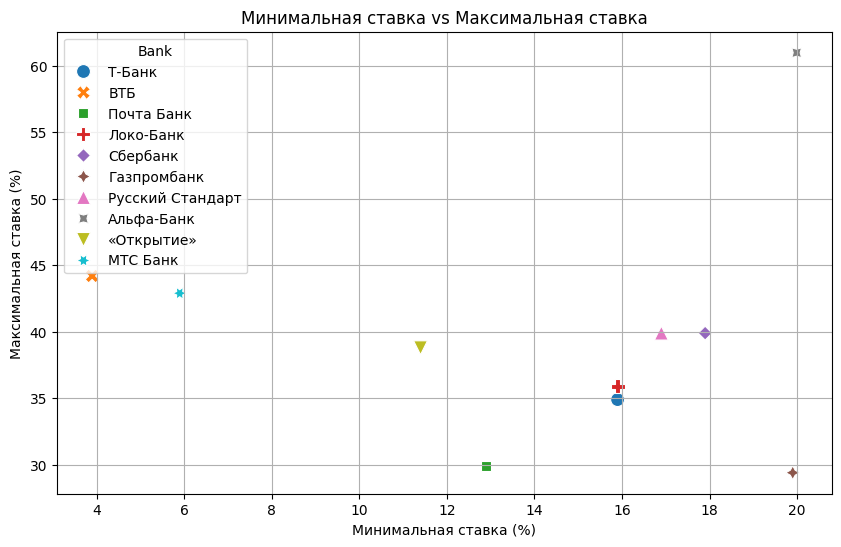

In [42]:
# Визуализация минимальных и максимальных процентных ставок
plt.figure(figsize=(12, 6))
sns.histplot(df['Min Rate'], bins=10, kde=True, label='Min Rate', color='blue', alpha=0.6)
sns.histplot(df['Max Rate'], bins=10, kde=True, label='Max Rate', color='red', alpha=0.6)
plt.title('Распределение минимальных и максимальных процентных ставок')
plt.xlabel('Процентная ставка (%)')
plt.ylabel('Количество банков')
plt.legend()
plt.show()

# Диаграмма рассеяния
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Min Rate', y='Max Rate', data=df, hue='Bank', style='Bank', s=100)
plt.title('Минимальная ставка vs Максимальная ставка')
plt.xlabel('Минимальная ставка (%)')
plt.ylabel('Максимальная ставка (%)')
plt.grid()
plt.show()


In [43]:
# 10. Сохранение DataFrame в CSV
df.to_csv('banki_credits_data.csv', index=False)

# Если вы используете Google Colab, можно скачать файл
from google.colab import files
files.download('banki_credits_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Общий вывод

Минимальная процентная ставка варьируется от 3.9% до 19.99%, в то время как максимальная ставка достигает 60.99%. Это свидетельствует о значительных различиях в условиях кредитования, предлагаемых различными банками.
Наибольшая минимальная ставка (19.99%) - Альфа-Банк, наименьшая (3.9%) — ВТБ.
Стоимость кредита:

Общая стоимость кредита также варьируется. Самая высокая варируемость (40%) связана с предложением от Т-Банка, что может указывать на скрытые или дополнительные расходы.

Суммы кредитования:

Большинство банков предлагают кредиты на суммы до 5 миллионов рублей, но некоторые банки, такие как ВТБ и Альфа-Банк, могут предоставить кредиты на значительно большие суммы — до 40 миллионов. Сроки кредитования в основном составляют до 5 или 7 лет, что соответствует средним рыночным условиям.


# Выводы по визуализациям:

Гистограмма минимальных и максимальных процентных ставок показывает, что большинство банков предлагает минимальные ставки в диапазоне 10-20%, однако есть и крайние значения, что может быть связано с более нестандартными условиями.

Диаграмма рассеяния показывает, что в большинстве случаев более низкие минимальные ставки соответствуют более высоким максимальным ставкам. Это может указывать на то, что банки, предлагающие более выгодные условия на первый взгляд, могут компенсировать это за счет повышения максимальных ставок или дополнительных сборов.